This notebook can be used to see test results without re-running the test, use the right number of classes that correspond to the test results file name

In [25]:
import numpy as np
from matplotlib import pyplot as plt
classes = ['background','book','cellphone','mouse','ringbinder'] # for ICUB_4
#classes=['background','book','cellphone','hairbrush','mouse','perfume','sunglasses'] # for ICUB_6
#classes = ['background','book','cellphone','mouse','ringbinder','hairbrush','perfume','sunglasses'] # for ICUB_7
#classes = ['background','book1','book2','book3','book4','book5',
#          'cellphone1','cellphone2','cellphone3','cellphone4','cellphone5',
#          'mouse1','mouse2','mouse3','mouse4','mouse5',
#          'ringbinder1','ringbinder2','ringbinder3','ringbinder4','ringbinder5']#for ICUB_Instance_20

n_classes = len(classes) -1
test_file_path = 'Test_Results/SSD7_4_unseen.npz'#fill here the path of the test file.npz
data = np.load(test_file_path )
mean_average_precision = data['mean_average_precision']
average_precisions = data['average_precisions']
precisions = data['precisions']
recalls = data['recalls']


In [26]:
for i in range(1, len(average_precisions)):
    print("{:<14}{:<6}{}".format(classes[i], 'AP', round(average_precisions[i], 3)))
print()
print("{:<14}{:<6}{}".format('','mAP', mean_average_precision, 3))

book          AP    0.7
cellphone     AP    0.696
mouse         AP    0.859
ringbinder    AP    0.091

              mAP   0.5863995142368128


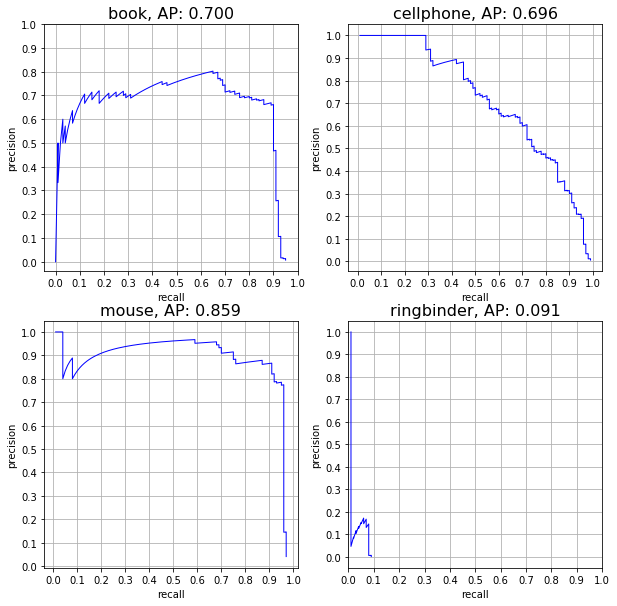

In [27]:
m = max((n_classes + 1) // 2, 2)
n = 2

fig, cells = plt.subplots(m, n, figsize=(n*5,m*5))
for i in range(m):
    for j in range(n):
        if n*i+j+1 > n_classes: break
        cells[i, j].plot(recalls[n*i+j+1], precisions[n*i+j+1], color='blue', linewidth=1.0)
        cells[i, j].set_xlabel('recall', fontsize=10)
        cells[i, j].set_ylabel('precision', fontsize=10)
        cells[i, j].grid(True)
        cells[i, j].set_xticks(np.linspace(0,1,11))
        cells[i, j].set_yticks(np.linspace(0,1,11))
        cells[i, j].set_title("{}, AP: {:.3f}".format(classes[n*i+j+1], average_precisions[n*i+j+1]), fontsize=16)